In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df.loc[df['Insulin'] > 0]
df.shape

(394, 9)

In [5]:

label_name = 'Insulin'

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=label_name, axis=1), 
                                                    df[label_name], 
                                                    test_size=0.2, 
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((315, 8), (79, 8), (315,), (79,))

In [7]:
import tensorflow as tf

In [8]:
input_shape = len(X_train.columns)
input_shape

8

In [9]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1),      
])
model

In [10]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [11]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, 
              loss="mse",
              metrics=["mse","mae"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1

In [13]:

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(X_train, y_train, 
                    epochs=1000, validation_split=0.2, 
                    callbacks=[early_stop], verbose=0)

In [14]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
130,11824.316406,11824.316406,76.801483,15979.069336,15979.069336,85.232811
131,14510.388672,14510.388672,79.111748,13107.980469,13107.980469,72.233727
132,15116.376953,15116.376953,77.912949,12549.045898,12549.045898,70.170448
133,12461.500000,12461.500000,77.845581,10475.645508,10475.645508,63.950905
134,12999.786133,12999.786133,77.378052,11859.539062,11859.539062,68.214767


<AxesSubplot:>

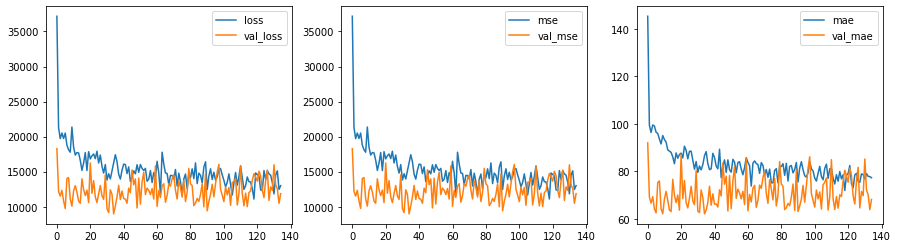

In [15]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["mse", "val_mse"]].plot(ax=axes[1])
df_hist[["mae", "val_mae"]].plot(ax=axes[2])

In [16]:
y_pred = model.predict(X_test).flatten()
y_pred.shape

(79,)

In [17]:

loss, mse, mae = model.evaluate(X_test,y_test)
print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

3/3 [==============================] - 0s 2ms/step - loss: 7515.2075 - mse: 7515.2075 - mae: 56.0910
테스트 세트의 평균 절대 오차: 56.09


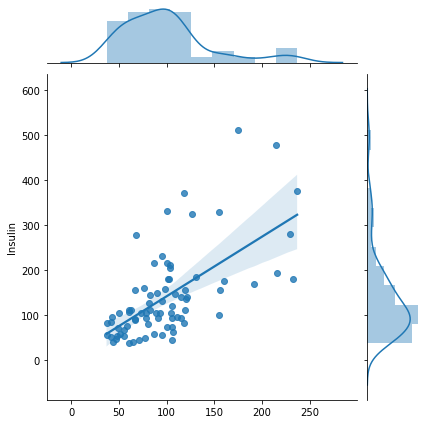

In [18]:
sns.jointplot(y_pred, y_test, kind='reg')